/tmp/ipykernel_1959102/2370221246.py:70: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('cool')  # You can choose any colormap


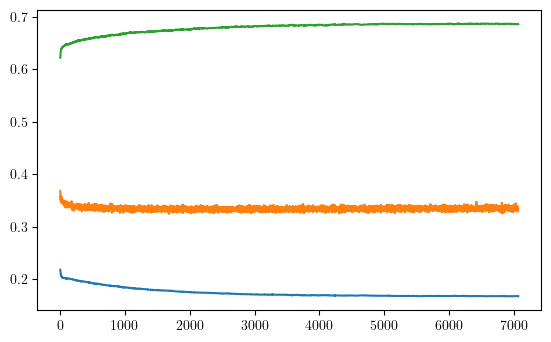

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd

ce_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_56_53.794+02_00.csv")
# dice_loss = pd.read_csv("")
dice_score = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_21_41.950+02_00.csv")
mse_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_22_31.002+02_00.csv")

for column in ce_loss.columns:
    if "val/ce_loss" in column:
        ce_series = ce_loss[column]
for column in dice_score.columns:
    if "val/global_dice" in column:
        dice_series = dice_score[column]
for column in mse_loss.columns:
    if "val/mse_loss" in column:
        mse_series = mse_loss[column]

FONT_SIZE = 10

# Example data
categories1 = ["vpp/002", "vpp/003", "vpp/005", "def/034", "def/037", "chlamy/004", "chlamy/005"]
categories1 = [r"$\texttt{"+elem+"}$" for elem in categories1]
categories2 = ["Rory", "C. reinhardtii", "Synthetic", "NOT S. oleracea"]

baseline1 = np.array([0.54, 0.33, 0.32, 0.41, 0.23, 0.76, 0.63])[::-1]
improvements1 = (np.array([0.62, 0.63, 0.51, 0.47, 0.45, 0.77, 0.65])[::-1] - baseline1)
f2fd_segm1 = np.array([0.66, 0.66, 0.44, 0.58, 0.65, 0.81, 0.66])[::-1]
segm1 = np.array([0.67, 0.69, 0.46, 0.58, 0.63, 0.72, 0.59])[::-1]

baseline2 = np.array([0.64, 0.59, 0.51, 0.62])[::-1]
improvements2 = (np.array([0.74, 0.68, 0.54, 0.66])[::-1] - baseline2)
f2fd_segm2 = np.array([0.90, 0.88, 0.81, 0.81])[::-1]
segm2 = np.array([0.93, 0.91, 0.905, 0.87])[::-1]


matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5


BOXPLOT_MEAN_PROPS = dict(marker='o', markerfacecolor='orange', markeredgecolor='black', markersize=2)
BOXPLOT_MEDIAN_PROPS = dict(color="black", markersize=2)
# to rgb
BOXPLOT_COLOR = "#40C0FE"

width = 1*TEXTWIDTH
height = 3.9
font_size = FONT_SIZE
bar_font_size = font_size-4
figlabel = ""

bar_height = 0.8
bar_width = 0.8
method_group_spacing = 3.4  # Keeping group spacing large for separation

in_group_spacing = 0.0 # Small space between bars within each group
ytick_labels = []  # List to hold the PDB names under each group of bars

fig, axes = plt.subplots(1, 1, figsize=(width, height))

colors_green = ["#edf8e9", "#bae4b3", "#74c476", "#238b45"]
colormap = cm.get_cmap('cool')  # You can choose any colormap
norm = Normalize(vmin=-1, vmax=3-1)

axes.plot(ce_series)
axes.plot(mse_series)
axes.plot(dice_series)

if FONT_SIZE != 11:
    filename = "plots/master/losses_long.pdf"

fig.savefig(filename, bbox_inches='tight', pad_inches=0)

plt.show()

(7073,)
(7074, 4)
(7073, 7)


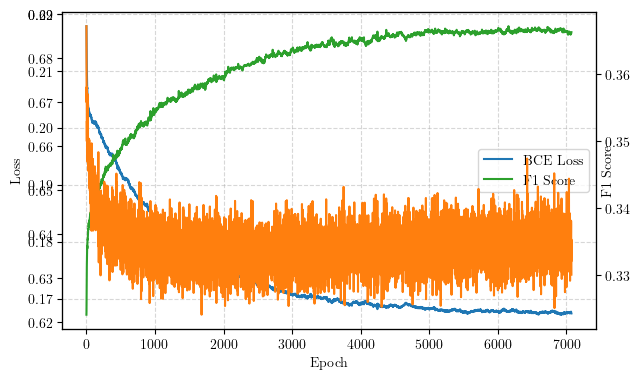

/tmp/ipykernel_1959102/984096133.py:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


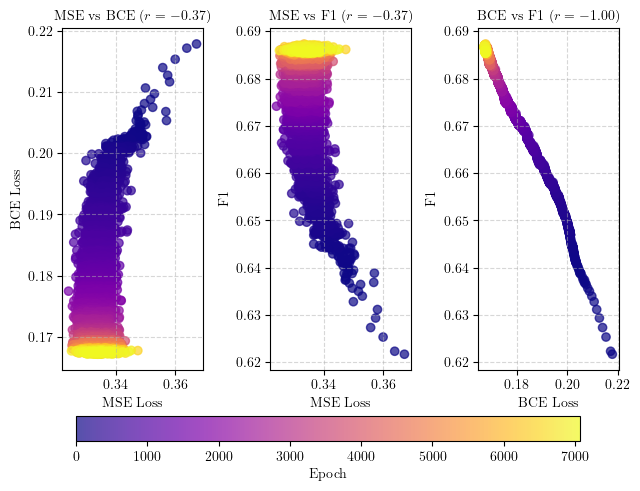

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import pandas as pd

# === Load your data ===
ce_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_56_53.794+02_00.csv")
dice_score = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_21_41.950+02_00.csv")
mse_loss = pd.read_csv("plots/wandb_export/wandb_export_2025-08-24T20_22_31.002+02_00.csv")

for column in ce_loss.columns:
    if "val/ce_loss" in column:
        ce_series = ce_loss[column].dropna().reset_index(drop=True)[:7073]
        print(np.array(ce_series).shape)
        break
for column in dice_score.columns:
    if "val/global_dice" in column:
        dice_series = dice_score[column].dropna().reset_index(drop=True)[:7073]
        print(np.array(dice_score).shape)
        break
for column in mse_loss.columns:
    if "val/mse_loss" in column:
        mse_series = mse_loss[column].dropna().reset_index(drop=True)
        print(np.array(mse_loss).shape)
        break
FONT_SIZE = 10
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern Roman']
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
matplotlib.rcParams.update({'font.size': FONT_SIZE})
TEXTWIDTH = 6.5

width = 1*TEXTWIDTH
height = 3.9
# height = 7

# === Compute correlations ===
corr_ce = np.corrcoef(ce_series, dice_series)[0, 1]
corr_mse = np.corrcoef(mse_series, dice_series)[0, 1]

# === 1. Dual-y plot (losses vs dice over epochs) ===
fig, ax1 = plt.subplots(figsize=(width, height))

epochs = np.arange(len(ce_series))

ax1.plot(epochs, ce_series, label="BCE Loss", color="tab:blue")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(epochs, dice_series, label="F1 Score", color="tab:green")
ax2.set_ylabel("F1 Score")

ax1.grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]

ax3 = ax2.twinx()
ax3.plot(epochs, mse_series, label="MSE Loss", color="tab:orange")


# Handle legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="center right")

fig.tight_layout()
fig.savefig("plots/master/losses_vs_dice.pdf", bbox_inches="tight", pad_inches=0)
plt.show()

# === 2. Scatter plot (Loss vs Dice) with correlation ===
fig, axes = plt.subplots(1, 3, figsize=(width, height))

sc1 = axes[2].scatter(ce_series, dice_series, c=epochs, cmap="plasma", alpha=0.7)
axes[2].set_xlabel("BCE Loss", fontsize=font_size)
axes[2].set_ylabel("F1", fontsize=font_size)
axes[2].set_title(fr"BCE vs F1 ($r={corr_ce:.2f}$)", fontsize=font_size)
# fig.colorbar(sc1, ax=axes[2], label="Epoch")

sc2 = axes[1].scatter(mse_series, dice_series, c=epochs, cmap="plasma", alpha=0.7)
axes[1].set_xlabel("MSE Loss", fontsize=font_size)
axes[1].set_ylabel("F1", fontsize=font_size)
axes[1].set_title(fr"MSE vs F1 ($r={corr_mse:.2f}$)", fontsize=font_size)
# fig.colorbar(sc2, ax=axes[1])

sc3 = axes[0].scatter(mse_series, ce_series, c=epochs, cmap="plasma", alpha=0.7)
axes[0].set_xlabel("MSE Loss", fontsize=font_size)
axes[0].set_ylabel("BCE Loss", fontsize=font_size)
axes[0].set_title(fr"MSE vs BCE ($r={corr_mse:.2f}$)", fontsize=font_size)
# fig.colorbar(sc2, ax=axes[0])

cbar = fig.colorbar(sc2, ax=axes, orientation="horizontal", anchor=(0, -5))
cbar.set_label("Epoch", fontsize=font_size)

axes[0].grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
axes[1].grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
axes[2].grid(True, linestyle='--', alpha=0.5)  # You can adjust linestyle and transparency as needed[]
fig.tight_layout()
fig.savefig("plots/master/scatter_losses_vs_dice.pdf", bbox_inches="tight", pad_inches=0)
plt.show()


In [1]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt

def project_and_save(mrc_path, output_png):
    # Load the MRC file
    with mrcfile.open(mrc_path, permissive=True) as mrc:
        data = mrc.data.astype(np.float32)

    # Ensure it's binary (0/1), in case values are not strict
    data = (data > 0).astype(np.float32)

    # Sum along the first axis (z-axis projection)
    projection = np.sum(data, axis=0)

    # Save projection as PNG
    plt.imsave(output_png, projection, cmap='gray')

if __name__ == "__main__":
    input_mrc = "/mnt/hdd_pool_zion/userdata/diyor/data/deepict/VPP/labels_pixel_10/TS_0003_membranes_trimmed.mrc"
    output_png = "vpp_003_gt.png"
    project_and_save(input_mrc, output_png)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load your PNG as an array (assuming grayscale labels)
img = plt.imread("rory_gt.png")

# If it's read as floats [0,1], scale back to integers
if img.max() <= 1.0:
    img = (img * 255).astype(np.uint8)

# Make sure it's 2D (if RGBA, take one channel)
if img.ndim == 3:
    img = img[:, :, 0]

# Define custom colormap: 0=black, 1=white, 2=green
cmap = ListedColormap(["black", "white", "green"])
# print(np.unique(img))
# Plot without axes
plt.imshow(img, cmap=cmap, vmin=0, vmax=255)
plt.axis("off")

# Save as PNG
plt.savefig("rory_gt_colored.png", bbox_inches="tight", pad_inches=0)
plt.close()
